In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = yfinance.download (tickers = "BTC-USD", start = "1985-01-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-09-22,26564.056641,26726.078125,26495.533203,26579.568359,26579.568359,10578746709
2023-09-23,26578.556641,26634.185547,26520.519531,26579.390625,26579.390625,7404700301
2023-09-24,26579.373047,26716.058594,26221.050781,26256.826172,26256.826172,8192867686


In [4]:
df.to_csv('BTC_daily.csv')

In [5]:
data = df['Close'].values
lows = df['Low'].values
highs = df['High']

In [6]:
profits = []
for i in range(data.shape[0]-1):
    profits.append((data[i+1]-data[i])/data[i])

In [7]:
len(profits)

3296

In [8]:
step = np.zeros((len(profits)-1 , 2))
for i in range(len(profits)-1):
    step[i,0] = profits[i]
    step[i,1] = profits[i+1]

In [9]:
profits = np.array(profits)
moves = np.zeros(profits.shape)
for i in range(profits.shape[0]):
    if (profits[i]>0):
        moves[i] = 1+profits[i]
    else :
        moves[i] = 1-profits[i]

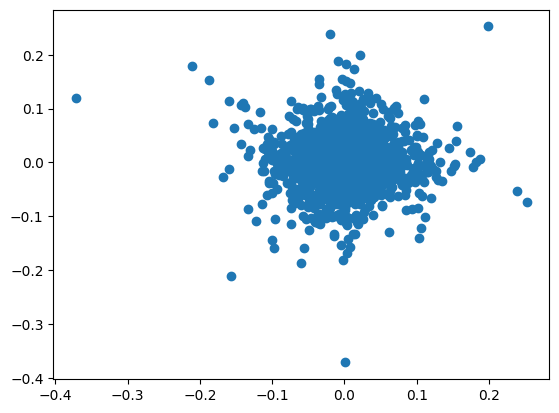

In [10]:
plt.plot(step[:,0] , step[:,1],'o')

In [11]:
plt.plot(np.prod(np.array(moves[:-2]).reshape(-1,30),axis = 1)[-50:])

ValueError: cannot reshape array of size 3294 into shape (30)

In [12]:
acprof = np.prod(np.array(moves[:-2]).reshape(-1,30),axis = 1)[-50:]
test = np.zeros(acprof.shape)
for i in range (acprof.shape[0]):
    if (acprof[i]>=1):
        test[i] = 1
    else :
        test[i] = -1

ValueError: cannot reshape array of size 3294 into shape (30)

In [13]:
test

NameError: name 'test' is not defined

In [14]:
svr_model = SVR(kernel='rbf')
x = step[:,0].reshape(-1,1)
y = step[:,1]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=30)
svr_model.fit(xtrain,ytrain)

# Make predictions
predictions = svr_model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, predictions)
print(f"Mean Squared Error: {mse/np.mean(predictions)}")

Mean Squared Error: 1.4509318655196008


In [15]:
np.round(predictions,3)

array([-0.007, -0.007,  0.004, -0.006,  0.004,  0.005, -0.007,  0.003,
       -0.006, -0.005, -0.001, -0.007, -0.007, -0.003, -0.007, -0.007,
       -0.003, -0.006, -0.001,  0.01 , -0.043,  0.015,  0.019, -0.006,
       -0.006,  0.01 , -0.044, -0.002,  0.123,  0.019, -0.006, -0.006,
       -0.007,  0.004,  0.   ,  0.004, -0.007, -0.002, -0.007,  0.002,
       -0.007,  0.003,  0.008,  0.016,  0.001, -0.001,  0.001,  0.019,
       -0.004,  0.012,  0.001,  0.015,  0.016, -0.007,  0.006,  0.006,
       -0.003, -0.007,  0.003, -0.005,  0.02 , -0.007,  0.015, -0.007,
        0.003,  0.019,  0.   ,  0.003, -0.004,  0.016,  0.003, -0.004,
       -0.04 ,  0.001, -0.001, -0.005, -0.002,  0.016, -0.006,  0.003,
       -0.004, -0.007, -0.   , -0.004, -0.001, -0.005, -0.004,  0.008,
        0.003, -0.006,  0.004,  0.02 , -0.005,  0.   , -0.003, -0.002,
        0.018,  0.018, -0.002, -0.007,  0.001,  0.003,  0.004,  0.011,
       -0.007,  0.013, -0.004, -0.006, -0.007, -0.004, -0.007,  0.   ,
      

In [16]:
np.round(ytest,2)

array([ 0.05,  0.01,  0.  ,  0.  ,  0.  , -0.04, -0.  ,  0.04, -0.02,
       -0.  ,  0.03,  0.  ,  0.04,  0.  ,  0.06,  0.06,  0.  ,  0.08,
       -0.  ,  0.  ,  0.02,  0.01,  0.11,  0.  ,  0.02, -0.02, -0.06,
        0.04,  0.01,  0.01,  0.01, -0.04,  0.  ,  0.02, -0.02,  0.03,
       -0.02, -0.01,  0.  , -0.11,  0.  ,  0.01, -0.01,  0.02, -0.01,
       -0.  ,  0.02,  0.01, -0.01,  0.01,  0.02, -0.04, -0.  , -0.03,
        0.06, -0.06, -0.  , -0.01,  0.  ,  0.01, -0.02,  0.01,  0.08,
       -0.  ,  0.02,  0.01,  0.01,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,
       -0.02, -0.  , -0.08,  0.  ,  0.01,  0.07,  0.08,  0.01,  0.02,
       -0.03,  0.01, -0.1 ,  0.01, -0.  ,  0.01, -0.  ,  0.02, -0.01,
        0.02, -0.02, -0.06,  0.03, -0.  ,  0.01,  0.06,  0.02,  0.02,
       -0.  ,  0.01,  0.06, -0.01, -0.01,  0.04, -0.03, -0.04,  0.  ,
        0.16,  0.01,  0.05, -0.03, -0.04,  0.03,  0.04, -0.13,  0.  ,
        0.02, -0.02, -0.  , -0.  ,  0.01, -0.01, -0.  ,  0.1 ,  0.  ,
        0.02,  0.  ,

In [17]:
def simulate (T , l , p , profits , data , buy , sell):
    print("Price Now: " + str(data[-1]))
    long = 0
    newpos = 0
    liq = 0
    if (buy[-1]>sell[-1]):
        long = 1
    else:
        long = -1
    lim = data.shape[0]-1
    if (long == 1):
        lastprof , liqp = PROFITS([buy[-1]] , [lim] , lows[-lim:] , highs[-lim:] , data , l , p)
    else :
        lastprof , liqp = PROFITS([lim] , [sell[-1]] , lows[-lim:] , highs[-lim:] , data , l , p)
    if (lastprof[0]<=(-1/l)):
        liq = 1

    if (buy[-1] == data.shape[0]):
        newpos = 1
        print("NEW TRADE IN: LONG")
    if (sell[-1] == data.shape[0]):
        newpos = -1
        print("NEW TRADE IN: SHORT")
    if (long == 1):
        if (liq == 0):
            print("Last trade : Long ("+ str(data[buy[-1]]) + "), Profit : " + str(lastprof[0]) + " | liquidation price is: " + str(liqp))
        else :
            print("LIQUIDATED at: " + str(liqp) )
    else :
        if (liq ==0):
            print("Last trade : Short ("+ str(data[sell[-1]]) + "), Profit : " + str(lastprof[0]) + " | liquidation price is: " + str(liqp))
        else :
            print("LIQUIDATED at: " + str(liqp))
    np.append(profits , lastprof[0])
    numtrades , maxdrawdown , maxwin , allprofit , multiplyer = RATE(profits)
    lasts = multiplyer[-T:]/multiplyer[-T]
    plt.plot(lasts)

In [18]:
def SMA(n , dat):
    sma_list = [0] * (n - 1)
    for i in range(n, dat.shape[0]+1):
        sma_list.append(np.mean(dat[i-n:i]))
    return(sma_list)

In [19]:
def CUTS(sma1 , sma2): # sma1 shorter than sma2
    buy = []
    sell = []
    old = 1
    for i in range(len(sma1)):
        if (sma1[i]>=sma2[i]):
            new = 1
        else:
            new = -1
        if (old != new):
            if (new==-1) :
                sell.append(i)
            else:
                buy.append(i)
        old = new
    return buy , sell

In [20]:
def PROFITS (buys , sells , lows , highs, data , l , pos):
    fees = 0.9999
    profit = []
    if (len(buys)>1):
        if (buys[0] > sells[0]):
            for i in range(len(buys)):
                maxi = np.max(highs[sells[i]:buys[i]+1])
                allowed = data[sells[i]] * (1 + 1/l)*(fees**(4*(buys[i] - sells[i] + np.argmax(highs[sells[i]:buys[i]+1]))))
                if (allowed > maxi):
                    p =  (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*pos)*(fees**(4*(buys[i] - sells[i])))
                    profit.append(p)
                else:
                    p = -1 * pos*(fees**(4*(buys[i] - sells[i] + np.argmax(highs[sells[i]:buys[i]+1]))))
                    profit.append(p)
                if (i!=(len(buys)-1)):
                    mini = np.min(lows[buys[i]:sells[i+1]])
                    allowed = data[buys[i]] * (1 - 1/l)/(fees**(4*(buys[i] - sells[i+1] + np.argmin(lows[buys[i]:sells[i+1]+1]))))
                    if (allowed < mini):
                        p = (((data[sells[i+1]] - data[buys[i]+1])/data[buys[i]])*l*pos)*(fees**(4*(sells[i+1] - buys[i])))
                        profit.append(p)
                    else:
                        p = -1 * pos*(fees**(4*(buys[i] - sells[i+1] + np.argmin(lows[buys[i]:sells[i+1]+1]))))
                        profit.append(p)
    elif (len(buys) == 1) :
        if (buys[0] > sells[0]):
            for i in range(len(buys)):
                fee = 1
                if (buys[i] == sells[i]):
                    maxi = highs[buys[i]-1]
                    arg = buy[i]
                else:
                    maxi = np.max(highs[sells[i]:buys[i]+1])
                    arg = np.argmax(highs[sells[i]:buys[i]+1])
                    fee = (fees**(4*(buys[i] - sells[i] + arg)))
                allowed = data[sells[i]] * (1 + 1/l)*fee
                if (allowed > maxi):
                    p =  (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*pos)*(fees**(4*(buys[i] - sells[i])))
                    profit.append(p)
                else:
                    p = -1 * pos*fee
                    profit.append(p)
        else:
            for i in range(len(buys)):
                fee = 1
                if (buys[i] == sells[i]):
                    mini = lows[buys[i]-1]
                    arg = buys[i]
                else:
                    mini = np.min(lows[buys[i]:sells[i]])
                    arg = np.argmin(lows[buys[i]:sells[i]+1])
                    fee = (fees**(4*(buys[i] - sells[i] + arg)))
                allowed = data[buys[i]] * (1 - 1/l)/fee
                if (allowed < mini):
                    p = (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*pos)*(fees**(4*(sells[i] - buys[i])))
                    profit.append(p)
                else:
                    p = -1 * pos*fee
                    profit.append(p)
    return profit,allowed

In [21]:
def PROFITS1 (buys , sells , lows , highs, data , l , pos):
    fees = 0.9999
    profit = []
    if (len(buys)>0):
        if (buys[0] > sells[0]):
            for i in range(len(buys)):
                maxi = np.max(highs[sells[i]:buys[i]+1])
                allowed = data[sells[i]] * (1 + 1/l)*(fees**(4*(buys[i] - sells[i] + np.argmax(highs[sells[i]:buys[i]+1]))))
                if (allowed > maxi):
                    p =  (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*pos)*(fees**(4*(buys[i] - sells[i])))
                    profit.append(p)
                    #print("short")

                else:
                    p = -1 * pos*(fees**(4*(buys[i] - sells[i] + np.argmax(highs[sells[i]:buys[i]+1]))))
                    profit.append(p)
                if (i!=(len(buys)-1)):
                    mini = np.min(lows[buys[i]:sells[i+1]])
                    allowed = data[buys[i]] * (1 - 1/l)/(fees**(4*(buys[i] - sells[i+1] + np.argmin(lows[buys[i]:sells[i+1]+1]))))
                    if (allowed < mini):
                        p = (((data[sells[i+1]] - data[buys[i]+1])/data[buys[i]])*l*pos)*(fees**(4*(sells[i+1] - buys[i])))
                        profit.append(p)
                        #print("long")
                    else:
                        p = -1 * pos*(fees**(4*(buys[i] - sells[i+1] + np.argmin(lows[buys[i]:sells[i+1]+1]))))
                        profit.append(p)
        else :
            for i in range(len(buys)):
                print("shit, we fuckedup in PROFITS function")
                p = (((data[sells[i]] - data[buys[i]])/data[buys[i]])*l*p)/(fees**(4*sells[i] - buys[i]))
                profit.append(p)
    profit = profit[1:]
    return profit

In [22]:
def SVMDATA(buys , sells , profits , data , sma1 , sma2 , thresh , f):
    feature = np.zeros ((len(profits)+1 , 3*f))
    result = np.zeros (len(profits))
    for i in range(len(profits)):
        if (profits[i]>thresh):
            result[i] = 1
        else :
            result [i] = -1
    long = -1
    if (buys[0] > sells[0]):
        sells = sells[1:]
    else :
        long = 1
        buys = buys[1:]
    entrys = []
    for i in range(max(len(buys) , len(sells))):
        if (long == 1):
            entrys.append(sells[i])
            if (i < len(buys)):
                entrys.append(buys[i])
        else :
            entrys.append(buys[i])
            if (i < len(sells)):
                entrys.append(sells[i])
    for i in range(len(entrys)):
        d1 = []
        for j in range (f):
            d1.append(sma1[entrys[i]-j])
            d1.append(sma2[entrys[i]-j])
            d1.append(data[entrys[i]-j])
        d1 = np.array(d1)
        d1 = d1/np.max(d1)
        feature [i , :] = d1
        
    return feature , result

In [23]:
def RATE(profs):
    fees = 0.999
    if (len(profs)>0):
        numtrades = len(profs)
        maxdrawdown = min(profs) 
        maxwin = max(profs)
        allprofit = 1
        multiplyer = [1] # your money in time
        for i in profs:
            multiplyer.append(allprofit * (1 + i) * fees)
            allprofit = allprofit * (1 + i)*fees
        return numtrades , maxdrawdown , maxwin , allprofit , multiplyer 
    else:
        return 0 , 0  , 0 , 1 , [1]

In [24]:
N = 700
l = 10
p = 0.35
smas = np.zeros((150 , N) , dtype = float)
for i in range (150):
    smas [i , :] = SMA(i+1 , data[-N:])
    
buy , sell = CUTS(smas[30 , :] , smas[35 , :])
profits  , x = PROFITS(buy , sell, lows[-N:] , highs[-N:] , data[-N:] , l , p)

Last SMA 30: [26270.3342994  26275.10042843 26278.14730343 26286.23802923
 26294.64761845]
Last SMA 35: [26246.43071832 26261.14832899 26265.61002604 26268.63492839
 26272.6632487 ]
SMA Difference: [277.28935477 310.8828825  340.84574513 367.72588521 396.58515345
 419.17484319 419.45533364 428.05683314 432.33255278 422.55969282
 346.7155893  253.74273704 156.74099217  69.71967231  -3.86837408
 -23.90358108 -13.95209943 -12.53727739 -17.60310085 -21.98436975]


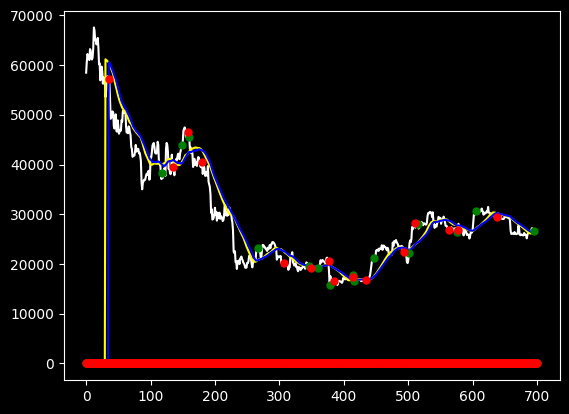

In [25]:
d = data[-N:]
t = np.linspace(0 , N , num = N)
buys = np.zeros(N)
sells = np.zeros(N)
for i in range(N):
    if i in buy:
        buys[i] = d[i]
    if i in sell:
        sells[i] = d[i]
plt.style.use('dark_background')
plt.plot(data[-N:] , color = 'white')
plt.plot(smas[30 , :] , color = 'yellow')
plt.plot(smas[35 , :] , color = 'blue')
plt.plot(t , buys , 'o' , color = 'green' , markersize = 5)
plt.plot(t , sells , 'o' , color = 'red' , markersize = 5)
print("Last SMA 30: " + str(smas[30 , -5:]))
print("Last SMA 35: " + str(smas[35 , -5:]))
print("SMA Difference: " + str(smas[35 , -20:] - smas[30 , -20:]))

Price Now: 26269.16015625
Last trade : Long (26567.6328125), Profit : -0.039241997181001735 | liquidation price is: 23891.747529329634


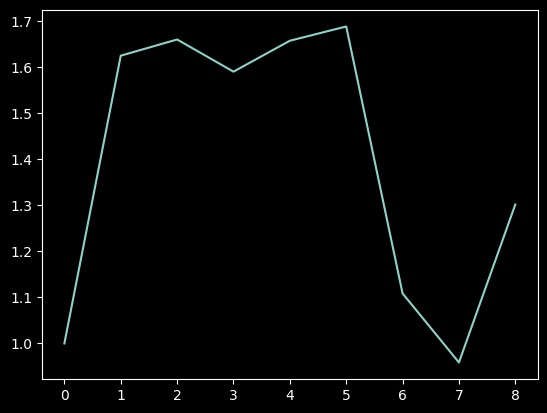

In [26]:
T = 9
simulate(T , l , p , profits , d  , buy , sell)

In [27]:
N = 3000
thresh = 0
f = 15
l = 10 
p = 0.35
smas = np.zeros((200 , N) , dtype = float)
for i in range (200):
    smas [i , :] = SMA(i+1 , data[-N:])

buy , sell = CUTS(smas[30 , :] , smas[35 , :])
profits = PROFITS1(buy , sell , lows[-N:] , highs[-N:], data[-N:] , l , p)
x , y = SVMDATA(buy , sell , profits , data[-N:] , smas[30 , :] , smas[35 , :] , thresh , f)

#y = y[1:]
#x = x[1: , :]
pca = PCA(n_components=2)
xpca = pca.fit_transform(x[:-1 , :])
### if you have a "PART" data
#xpca = xpca[(xpca < 1).all(axis=1)]
#y = y [(xpca < 1).all(axis=1)]
#profits = profits[(xpca < 1).all(axis=1)]

xr = np.zeros((int(np.sum(y[y==1])) , 2) , dtype = float)
xw = np.zeros((int(-1*np.sum(y[y==-1])) , 2) , dtype = float)
r = 0 
w = 0
for i in range(xpca.shape[0]-1):
    if (y[i]==1):
        xr[r , :] = xpca[i , :]
        r = r+1
for i in range(xpca.shape[0]-1):
    if (y[i]==-1):
        xw[w , :] = xpca[i , :]
        w = w+1 
new = pca.transform([x[-1 , :]])

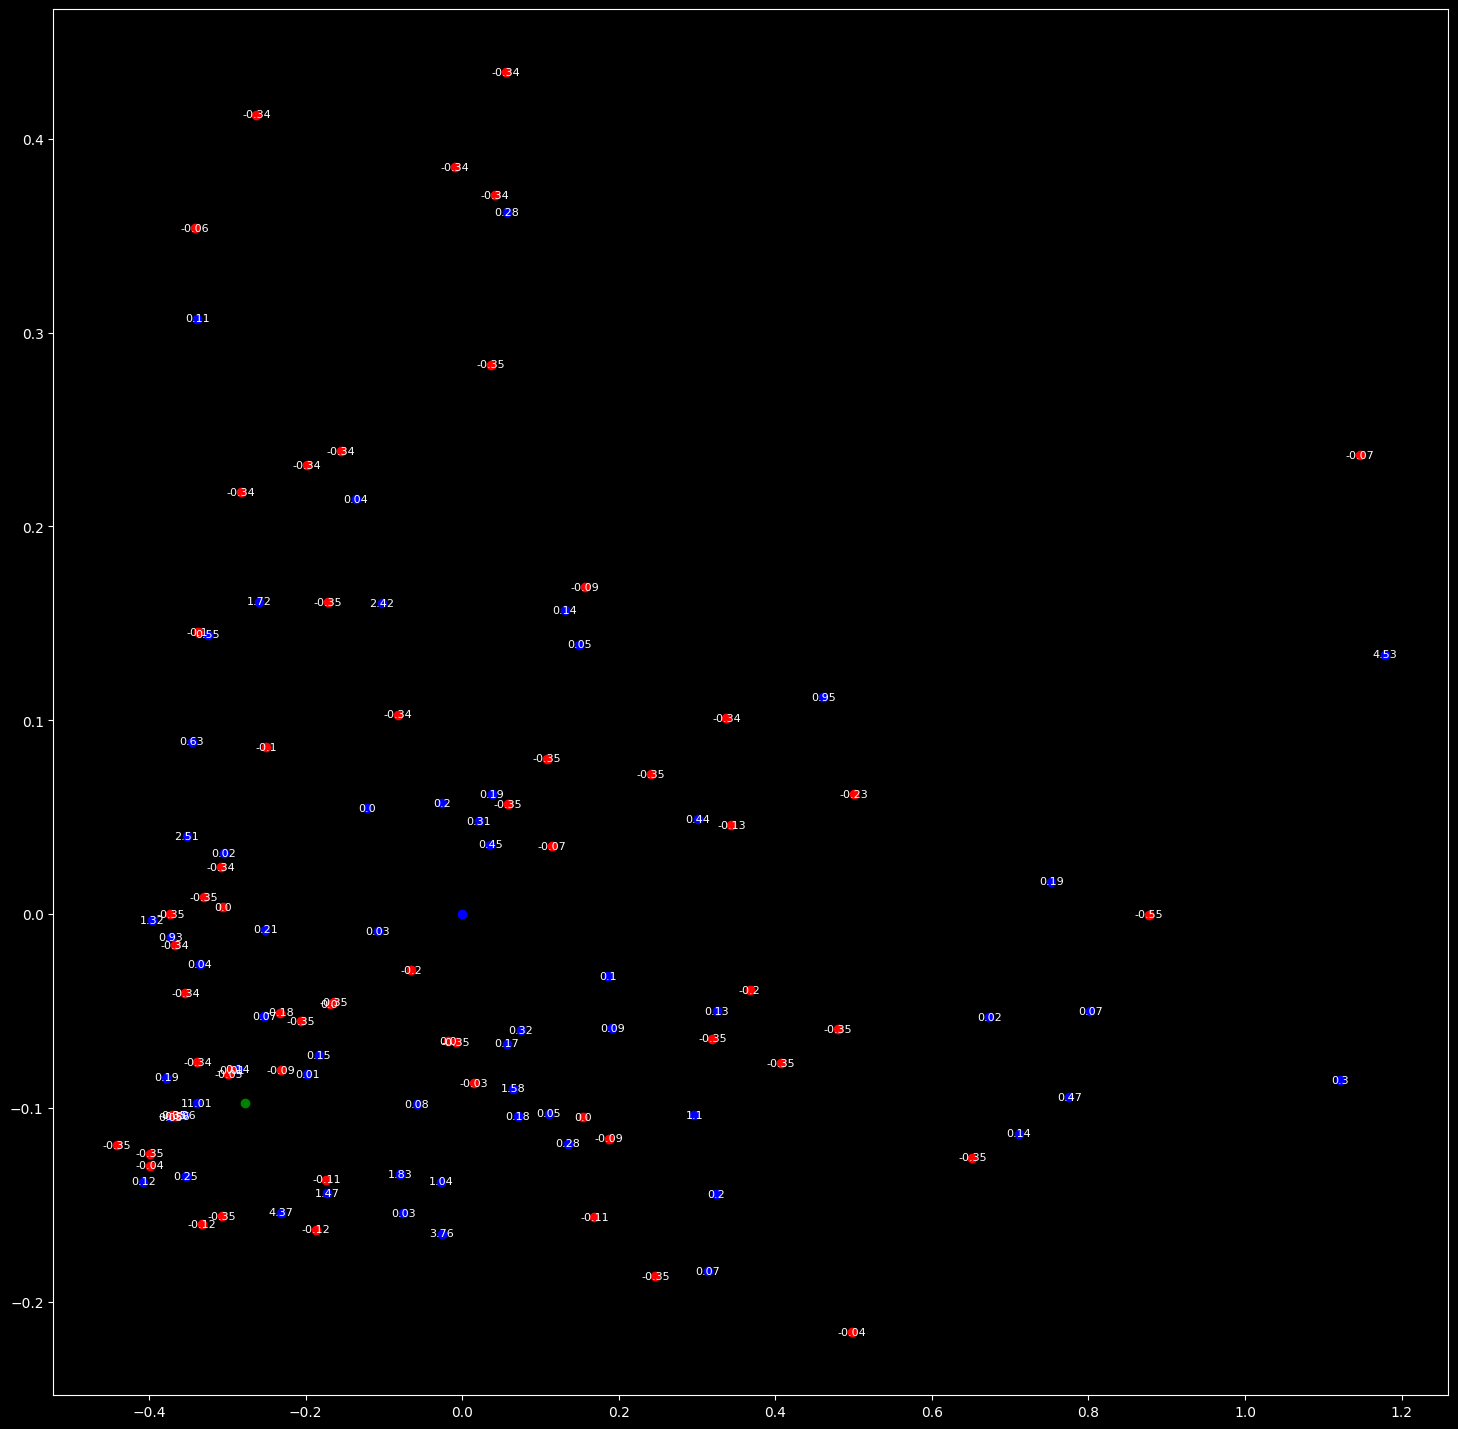

In [28]:
plt.figure(figsize = (18, 18))
plt.scatter(xr[: , 0], xr[: , 1] , color = 'blue' )
plt.scatter(xw[: , 0], xw[: , 1] , color = 'red')
plt.scatter(new[0 , 0] , new[0 , 1] , color = 'green')
for i in range(xpca.shape[0]-1):
    plt.text(xpca[i, 0], xpca[i, 1], np.round(profits[i] , 2), ha='center', va='center' , fontsize = '8')
#plt.xlim(-1 , 1.5)
#plt.ylim(-0.5 , 0.5)

In [29]:
def SVMDATA1(buys , sells , profits , data , sma1 , sma2 , thresh1 , thresh2 , f):
    feature = np.zeros ((len(profits)+1 , 3*f))
    result = np.zeros (len(profits))
    for i in range(len(profits)):
        if ((profits[i]>=thresh1) & (profits[i]<=thresh2)):
            result[i] = 1
        elif(profits[i]>thresh2):
            result[i] = 2
        elif(profits[i]<thresh1):
            result[i] = 3
    long = -1
    if (buys[0] > sells[0]):
        sells = sells[1:]
    else :
        long = 1
        buys = buys[1:]
    entrys = []
    for i in range(max(len(buys) , len(sells))):
        if (long == 1):
            entrys.append(sells[i])
            if (i < len(buys)):
                entrys.append(buys[i])
        else :
            entrys.append(buys[i])
            if (i < len(sells)):
                entrys.append(sells[i])
    for i in range(len(entrys)):
        d1 = []
        for j in range (f):
            d1.append(sma1[entrys[i]-j])
            d1.append(sma2[entrys[i]-j])
            d1.append(data[entrys[i]-j])
        d1 = np.array(d1)
        d1 = d1/np.max(d1)
        feature [i , :] = d1
        
    return feature , result

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
N = 3000
thresh = 0
f = 15
l = 10 
p = 0.35
smas = np.zeros((200 , N) , dtype = float)
for i in range (200):
    smas [i , :] = SMA(i+1 , data[-N:])

buy , sell = CUTS(smas[30 , :] , smas[35 , :])
profits = PROFITS1(buy , sell , lows[-N:] , highs[-N:], data[-N:] , l , p)
x , y = SVMDATA1(buy , sell , profits , data[-N:] , smas[30 , :] , smas[35 , :] , -0.05 , 0.05 , f)

#y = y[1:]
#x = x[1: , :]
lda = LinearDiscriminantAnalysis(n_components=2)
xpca = lda.fit_transform(x[:-1 , :] , y)
### if you have a "PART" data
#xpca = xpca[(xpca < 1).all(axis=1)]
#y = y [(xpca < 1).all(axis=1)]
#profits = profits[(xpca < 1).all(axis=1)]

xz = np.zeros((int(np.sum(y[y==3])/3) , 2) , dtype = float)##loss
xr = np.zeros((int(np.sum(y[y==1])) , 2) , dtype = float)##meh
xw = np.zeros((int(np.sum(y[y==2])/2) , 2) , dtype = float)## win
z = 0 
r = 0 
w = 0
for i in range(xpca.shape[0]-1):
    if (y[i]==3):
        xz[z , :] = xpca[i , :]
        z = z+1
for i in range(xpca.shape[0]-1):
    if (y[i]==1):
        xr[r , :] = xpca[i , :]
        r = r+1
for i in range(xpca.shape[0]-1):
    if (y[i]==2):
        xw[w , :] = xpca[i , :]
        w = w+1 
new = lda.transform([x[-1 , :]])

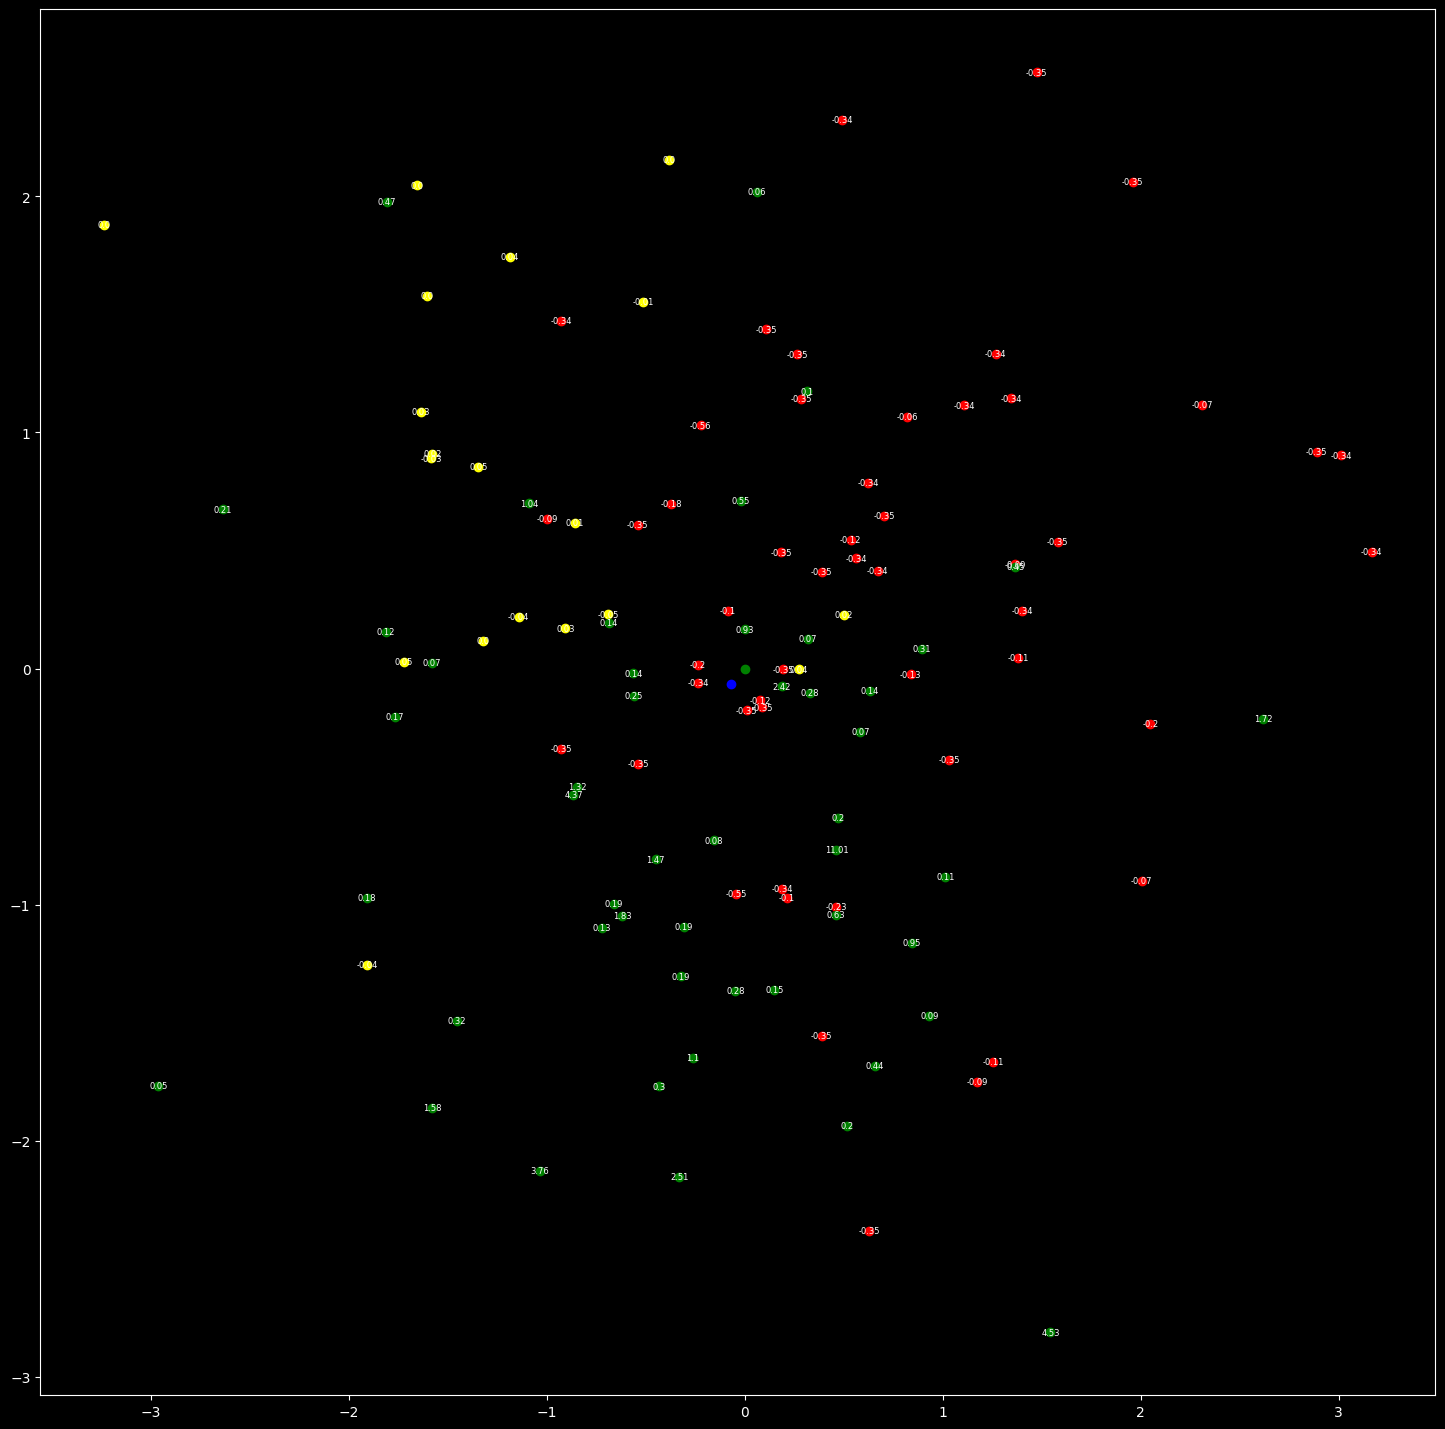

In [31]:
plt.figure(figsize = (18, 18))
plt.scatter(xz[: , 0], xz[: , 1] , color = 'red' )
plt.scatter(xr[: , 0], xr[: , 1] , color = 'yellow' )
plt.scatter(xw[: , 0], xw[: , 1] , color = 'green')
plt.scatter(new[0 , 0] , new[0 , 1] , color = 'blue')
for i in range(xpca.shape[0]-1):
    plt.text(xpca[i, 0], xpca[i, 1], np.round(profits[i] , 2), ha='center', va='center' , fontsize = '6')
#plt.xlim(-1 , 1.5)
#plt.ylim(-0.5 , 0.5)